Understanding OLS (Ordinary Least Squares) Regression
Regression, basically, means finding the best fit line/curve to your numerical data — a functional approximation of the data. That is, you want a mapping function of your input data to the output data (target). This mapping function is written as:

Ŷ = W*X + B

where B is the intercept and W is the slope of the line and Ŷ is the predicted output. The optimum values of W and B needs to be found to find the best fit line.

Ordinary Least Squares is an analytical solution to this linear regression model. By analytical, it means the exact solution is done by the numerical methods (formulas).

However, OLS can't be applied in practical examples as it is not scalable to all the algorithms and huge amount of data. Therefore we need to 'approximate' this OLS solution by another method which iterates towards the optimal solution slowly.

#load the ness
#load the data
#eda
#feature eng.-->encoding,resc etc
#feature selection-->Corr,vif,iv etc
#model building
#model evalution
#Model deployment

In [108]:
import numpy as np  #NUMERICAL
import pandas as pd  #pandas
import statsmodels.api as sm  #statics
import matplotlib.pyplot as plt #visul
from sklearn.linear_model import LinearRegression  #linear regression
import seaborn as sns#visul
sns.set()  #set the default seaborn style for our plots


Missing Values,Data Cleaning
Outliers
Correlation
Vizulation
Normalize
Multicollinearity
Dummies
LINEAR REGRESSION MODEL
Improving Model

In [109]:
#  Load the dataset
raw_data = pd.read_csv("scrap price.csv")
raw_data.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [110]:
raw_data.describe().round()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0
mean,103.0,1.0,99.0,174.0,66.0,54.0,2556.0,127.0,3.0,3.0,10.0,104.0,5125.0,25.0,31.0,13277.0
std,59.0,1.0,6.0,12.0,2.0,2.0,521.0,42.0,0.0,0.0,4.0,40.0,477.0,7.0,7.0,7989.0
min,1.0,-2.0,87.0,141.0,60.0,48.0,1488.0,61.0,3.0,2.0,7.0,48.0,4150.0,13.0,16.0,5118.0
25%,52.0,0.0,94.0,166.0,64.0,52.0,2145.0,97.0,3.0,3.0,9.0,70.0,4800.0,19.0,25.0,7788.0
50%,103.0,1.0,97.0,173.0,66.0,54.0,2414.0,120.0,3.0,3.0,9.0,95.0,5200.0,24.0,30.0,10295.0
75%,154.0,2.0,102.0,183.0,67.0,56.0,2935.0,141.0,4.0,3.0,9.0,116.0,5500.0,30.0,34.0,16503.0
max,205.0,3.0,121.0,208.0,72.0,60.0,4066.0,326.0,4.0,4.0,23.0,288.0,6600.0,49.0,54.0,45400.0


In [111]:
raw_data.describe(include='O')

,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [112]:
raw_data.isnull().sum()

,0
ID,0
symboling,0
name,0
fueltypes,0
aspiration,0
doornumbers,0
carbody,0
drivewheels,0
enginelocation,0
wheelbase,0


In [113]:
data=raw_data.drop('ID',axis=1)
data

,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [114]:
data.duplicated().sum()

0

In [115]:
data.name.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

Name column has many unique values, so I've decided to organise it a bit


In [116]:
#Name column has many unique values, so I've decided to organise it a bit
Car_name = data['name'].apply(lambda x : x.split(' ')[0])
data.insert(3,'Car_name',Car_name)
data.drop(['name'],axis=1,inplace=True)
data

,symboling,fueltypes,Car_name,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,volvo,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,volvo,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [117]:
data

,symboling,fueltypes,Car_name,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,volvo,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,volvo,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [118]:
data['Car_name'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [119]:
data['Car_name'].nunique()

28

Some spelling errors:

maxda=mazda

Nissan=nissan

porsche=porcshce

vokswagen=volkswagen=vw



In [120]:
data['Car_name'] = data['Car_name'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota',
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [121]:
data['Car_name'].nunique()

22

In [122]:
data.columns

Index(['symboling', 'fueltypes', 'Car_name', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

Outliers

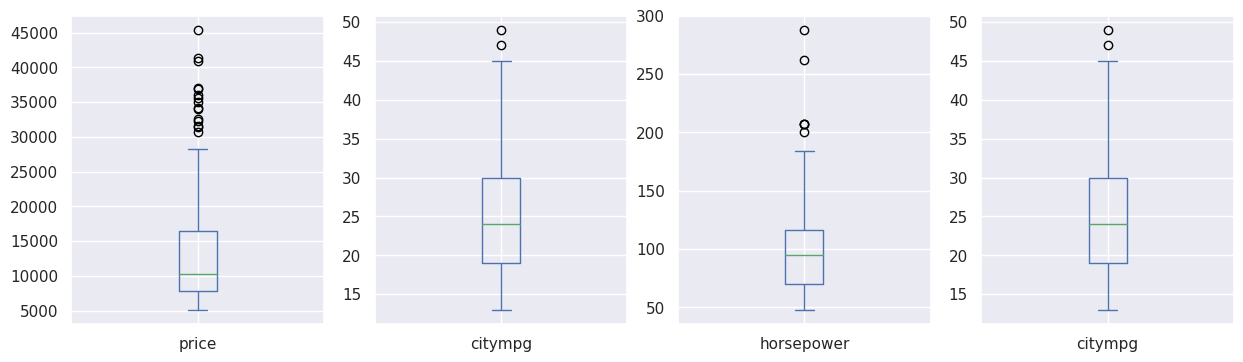

In [123]:
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
data.price.plot(kind='box')
plt.subplot(1,4,2)
data.citympg.plot(kind='box')
plt.subplot(1,4,3)
data.horsepower.plot(kind='box')
plt.subplot(1,4,4)
data.citympg.plot(kind='box')
plt.show()

In [124]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder   #label encoding converting cat~numeric


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Select categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Display the DataFrame with label encoding applied
print(data.head())


   symboling  fueltypes  Car_name  aspiration  doornumbers  carbody  \
0          3          1         1           0            1        0   
1          3          1         1           0            1        0   
2          1          1         1           0            1        2   
3          2          1         2           0            0        3   
4          2          1         2           0            0        3   

   drivewheels  enginelocation  wheelbase  carlength  ...  enginesize  \
0            2               0       88.6      168.8  ...         130   
1            2               0       88.6      168.8  ...         130   
2            2               0       94.5      171.2  ...         152   
3            1               0       99.8      176.6  ...         109   
4            0               0       99.4      176.6  ...         136   

   fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           5       3.47    2.68               9.0         

In [125]:
data.describe().round()

,symboling,fueltypes,Car_name,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,...,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0
mean,1.0,1.0,12.0,0.0,0.0,3.0,1.0,0.0,99.0,174.0,...,127.0,3.0,3.0,3.0,10.0,104.0,5125.0,25.0,31.0,13277.0
std,1.0,0.0,7.0,0.0,0.0,1.0,1.0,0.0,6.0,12.0,...,42.0,2.0,0.0,0.0,4.0,40.0,477.0,7.0,7.0,7989.0
min,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,141.0,...,61.0,0.0,3.0,2.0,7.0,48.0,4150.0,13.0,16.0,5118.0
25%,0.0,1.0,6.0,0.0,0.0,2.0,1.0,0.0,94.0,166.0,...,97.0,1.0,3.0,3.0,9.0,70.0,4800.0,19.0,25.0,7788.0
50%,1.0,1.0,12.0,0.0,0.0,3.0,1.0,0.0,97.0,173.0,...,120.0,5.0,3.0,3.0,9.0,95.0,5200.0,24.0,30.0,10295.0
75%,2.0,1.0,19.0,0.0,1.0,3.0,2.0,0.0,102.0,183.0,...,141.0,5.0,4.0,3.0,9.0,116.0,5500.0,30.0,34.0,16503.0
max,3.0,1.0,21.0,1.0,1.0,4.0,2.0,1.0,121.0,208.0,...,326.0,7.0,4.0,4.0,23.0,288.0,6600.0,49.0,54.0,45400.0


In [126]:
data2.describe().round()

,symboling,fueltypes,Car_name,aspiration,doornumbers,carbody,drivewheels,enginelocation,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,log_price
count,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,...,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0
mean,1.0,1.0,12.0,0.0,0.0,3.0,1.0,0.0,54.0,2255.0,...,108.0,2.0,3.0,3.0,9.0,84.0,5203.0,28.0,9088.0,9.0
std,1.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,2.0,317.0,...,18.0,2.0,0.0,0.0,0.0,18.0,409.0,4.0,3189.0,0.0
min,-2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,49.0,1819.0,...,79.0,0.0,3.0,3.0,8.0,60.0,4200.0,19.0,5195.0,9.0
25%,0.0,1.0,7.0,0.0,0.0,2.0,1.0,0.0,52.0,1974.0,...,92.0,1.0,3.0,3.0,9.0,69.0,4800.0,24.0,6850.0,9.0
50%,1.0,1.0,11.0,0.0,0.0,3.0,1.0,0.0,54.0,2228.0,...,103.0,1.0,3.0,3.0,9.0,77.0,5200.0,27.0,8244.0,9.0
75%,1.0,1.0,19.0,0.0,1.0,3.0,1.0,0.0,55.0,2413.0,...,122.0,5.0,3.0,3.0,9.0,92.0,5500.0,31.0,10182.0,9.0
max,3.0,1.0,21.0,0.0,1.0,4.0,2.0,0.0,60.0,3110.0,...,151.0,7.0,4.0,4.0,10.0,143.0,6000.0,38.0,22018.0,10.0


In [127]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data2 = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data2

,symboling,fueltypes,Car_name,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
3,2,1,2,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
10,2,1,3,0,1,3,2,0,101.2,176.8,...,108,5,3.50,2.80,8.8,101,5800,23,29,16430.0
11,0,1,3,0,0,3,2,0,101.2,176.8,...,108,5,3.50,2.80,8.8,101,5800,23,29,16925.0
19,1,1,5,0,1,2,1,0,94.5,155.9,...,90,1,3.03,3.11,9.6,70,5400,38,43,6295.0
20,0,1,5,0,0,3,1,0,94.5,158.8,...,90,1,3.03,3.11,9.6,70,5400,38,43,6575.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-2,1,21,0,0,3,2,0,104.3,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,12940.0
195,-1,1,21,0,0,4,2,0,104.3,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,13415.0
196,-2,1,21,0,0,3,2,0,104.3,188.8,...,141,5,3.78,3.15,9.5,114,5400,24,28,15985.0
197,-1,1,21,0,0,4,2,0,104.3,188.8,...,141,5,3.78,3.15,9.5,114,5400,24,28,16515.0


In [128]:
Q1

,0.25
symboling,0.00
fueltypes,1.00
Car_name,6.00
aspiration,0.00
doornumbers,0.00
carbody,2.00
drivewheels,1.00
enginelocation,0.00
wheelbase,94.50
carlength,166.30


In [129]:
q1 = data2.quantile(0.25)
q1

,0.25
symboling,0.000
fueltypes,1.000
Car_name,7.000
aspiration,0.000
doornumbers,0.000
carbody,2.000
drivewheels,1.000
enginelocation,0.000
wheelbase,94.500
carlength,159.925


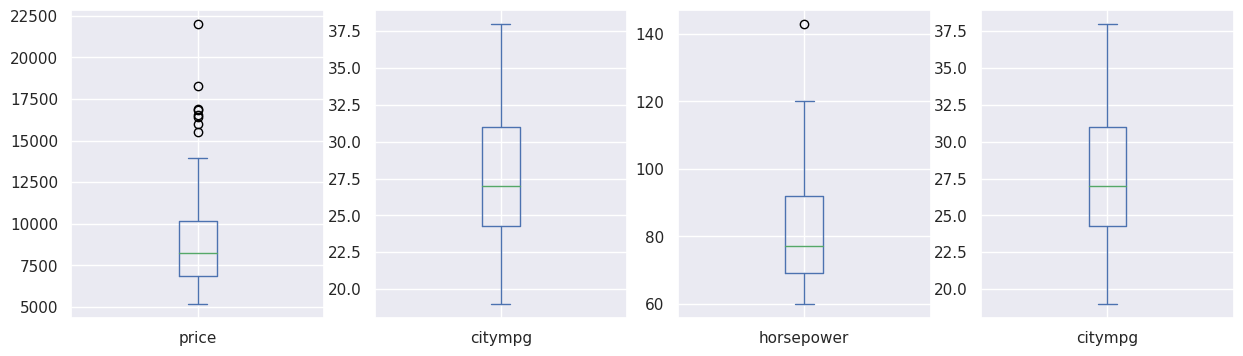

In [130]:
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
data2.price.plot(kind='box')
plt.subplot(1,4,2)
data2.citympg.plot(kind='box')
plt.subplot(1,4,3)
data2.horsepower.plot(kind='box')
plt.subplot(1,4,4)
data2.citympg.plot(kind='box')
plt.show()

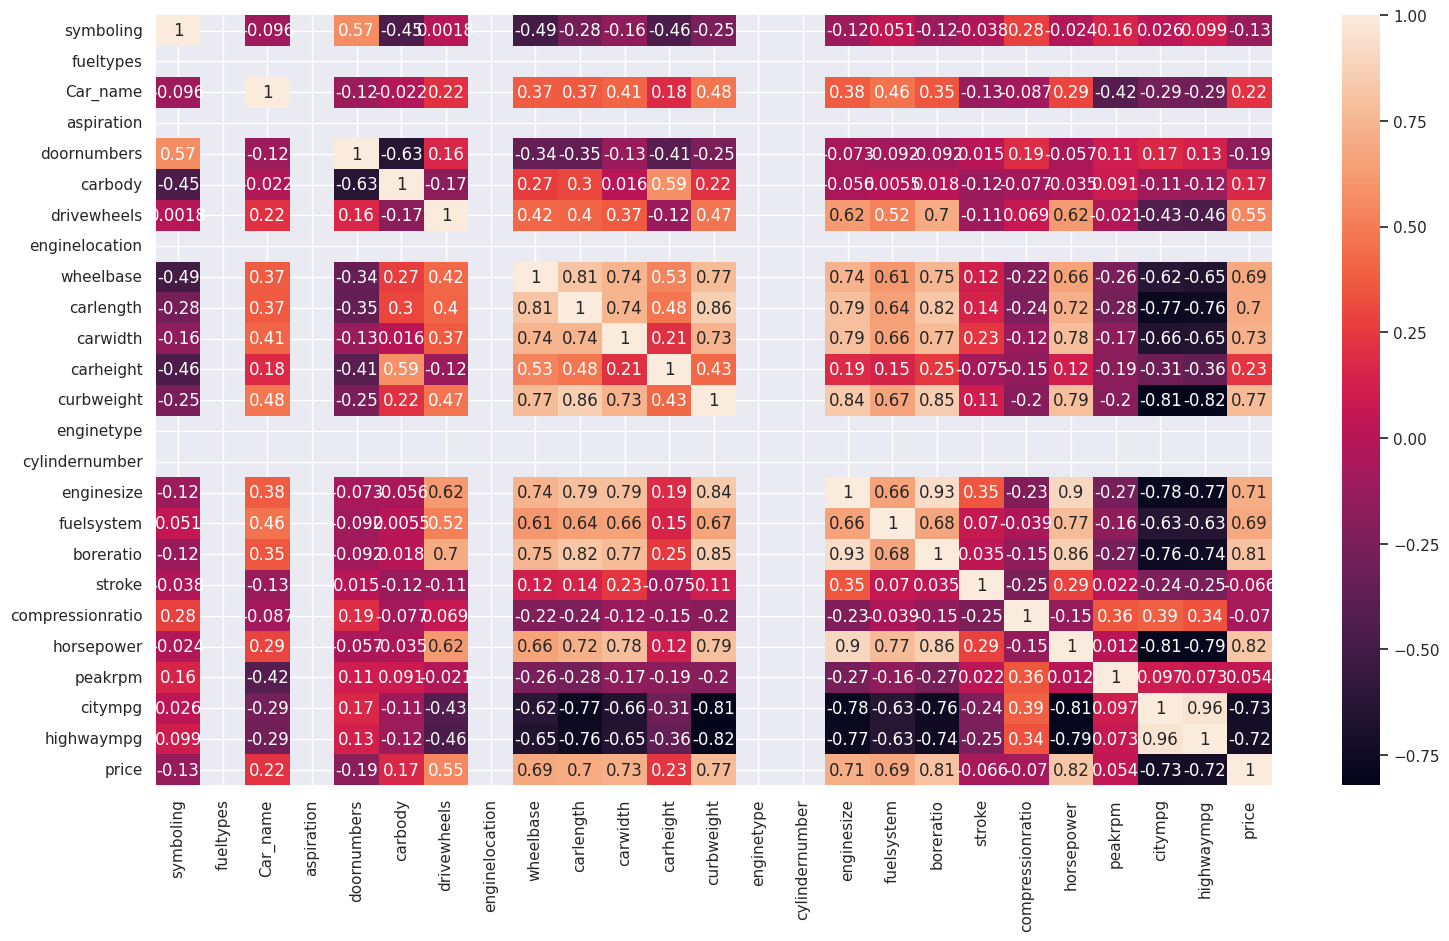

In [133]:
plt.figure(figsize=(18,10))
sns.heatmap(data2.corr(),annot=True)
plt.show()

In [136]:
data2.drop(columns=['symboling','Car_name','doornumbers','stroke','peakrpm'],axis=1,inplace=True)

<ipython-input-136-76e0f282d8e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop(columns=['symboling','Car_name','doornumbers','stroke','peakrpm'],axis=1,inplace=True)


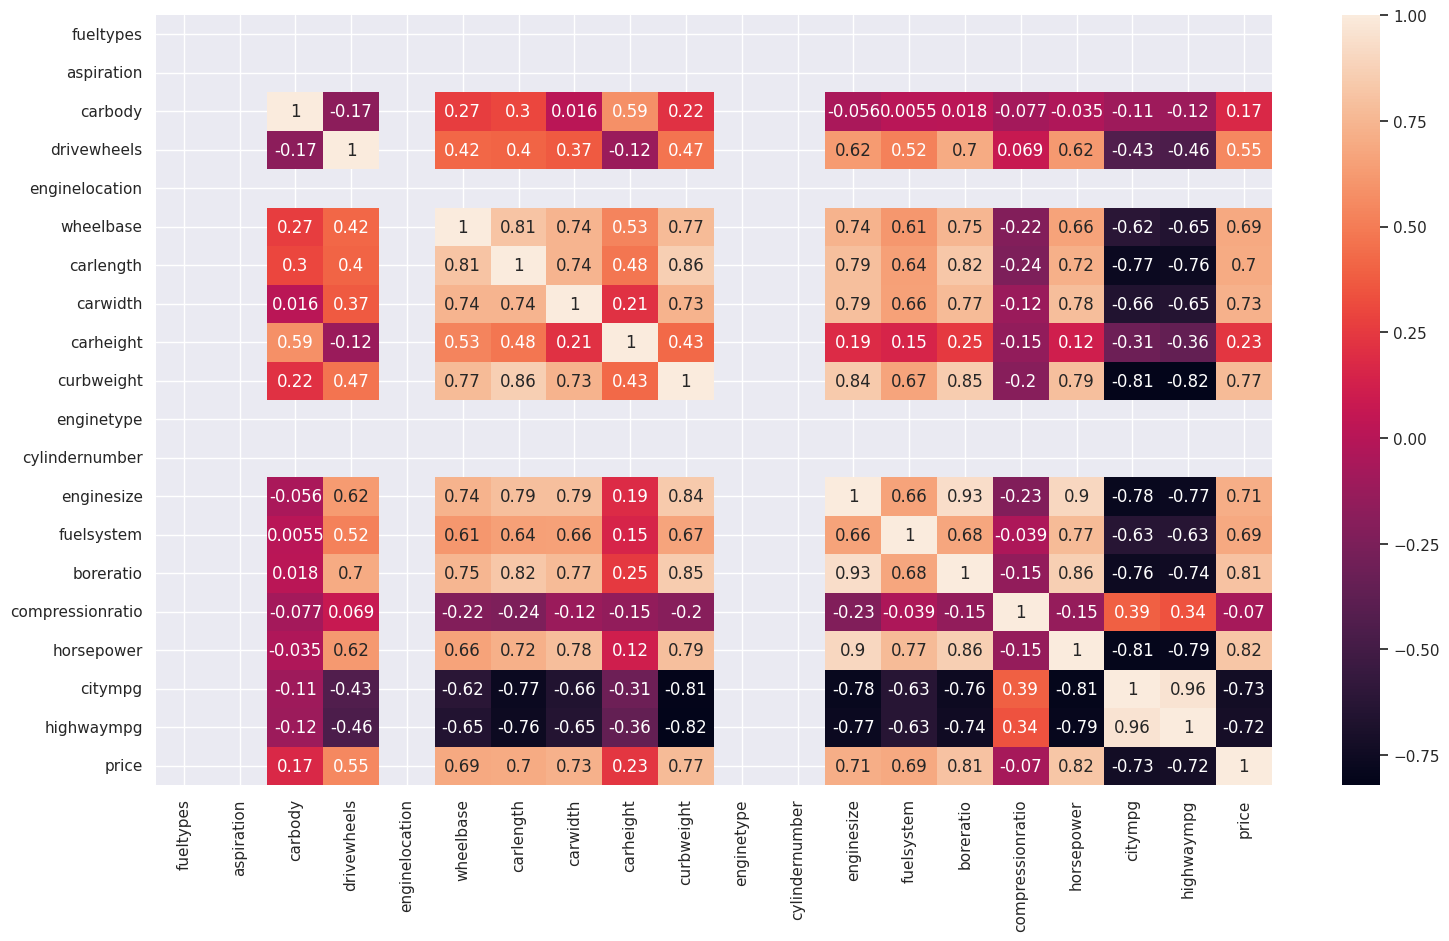

In [138]:
plt.figure(figsize=(18,10))
sns.heatmap(data2.corr(),annot=True)
plt.show()

In [137]:
data2.corr()

,fueltypes,aspiration,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,compressionratio,horsepower,citympg,highwaympg,price
fueltypes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carbody,NaN,NaN,1.000000,-0.174945,NaN,0.267264,0.297505,0.015843,0.586272,0.215438,NaN,NaN,-0.055923,0.005454,0.017755,-0.076835,-0.035333,-0.109633,-0.116058,0.167945
drivewheels,NaN,NaN,-0.174945,1.000000,NaN,0.417058,0.404893,0.373484,-0.120486,0.467900,NaN,NaN,0.624229,0.517419,0.698730,0.069338,0.616442,-0.431298,-0.455516,0.551499
enginelocation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,NaN,NaN,0.267264,0.417058,NaN,1.000000,0.809709,0.738935,0.531261,0.771893,NaN,NaN,0.735311,0.613197,0.749688,-0.220384,0.663226,-0.616474,-0.651679,0.689400
carlength,NaN,NaN,0.297505,0.404893,NaN,0.809709,1.000000,0.740516,0.475845,0.860195,NaN,NaN,0.793305,0.644350,0.824282,-0.238634,0.720213,-0.770217,-0.759450,0.699422
carwidth,NaN,NaN,0.015843,0.373484,NaN,0.738935,0.740516,1.000000,0.214488,0.733271,NaN,NaN,0.793171,0.657718,0.768111,-0.120484,0.783644,-0.657502,-0.648289,0.728880
carheight,NaN,NaN,0.586272,-0.120486,NaN,0.531261,0.475845,0.214488,1.000000,0.425047,NaN,NaN,0.186462,0.148645,0.249099,-0.153812,0.116606,-0.309652,-0.358167,0.234541
curbweight,NaN,NaN,0.215438,0.467900,NaN,0.771893,0.860195,0.733271,0.425047,1.000000,NaN,NaN,0.841532,0.668726,0.845976,-0.198843,0.791432,-0.810228,-0.821087,0.771773


In [139]:
data2.columns

Index(['fueltypes', 'aspiration', 'carbody', 'drivewheels', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'compressionratio', 'horsepower', 'citympg', 'highwaympg', 'price'],
      dtype='object')

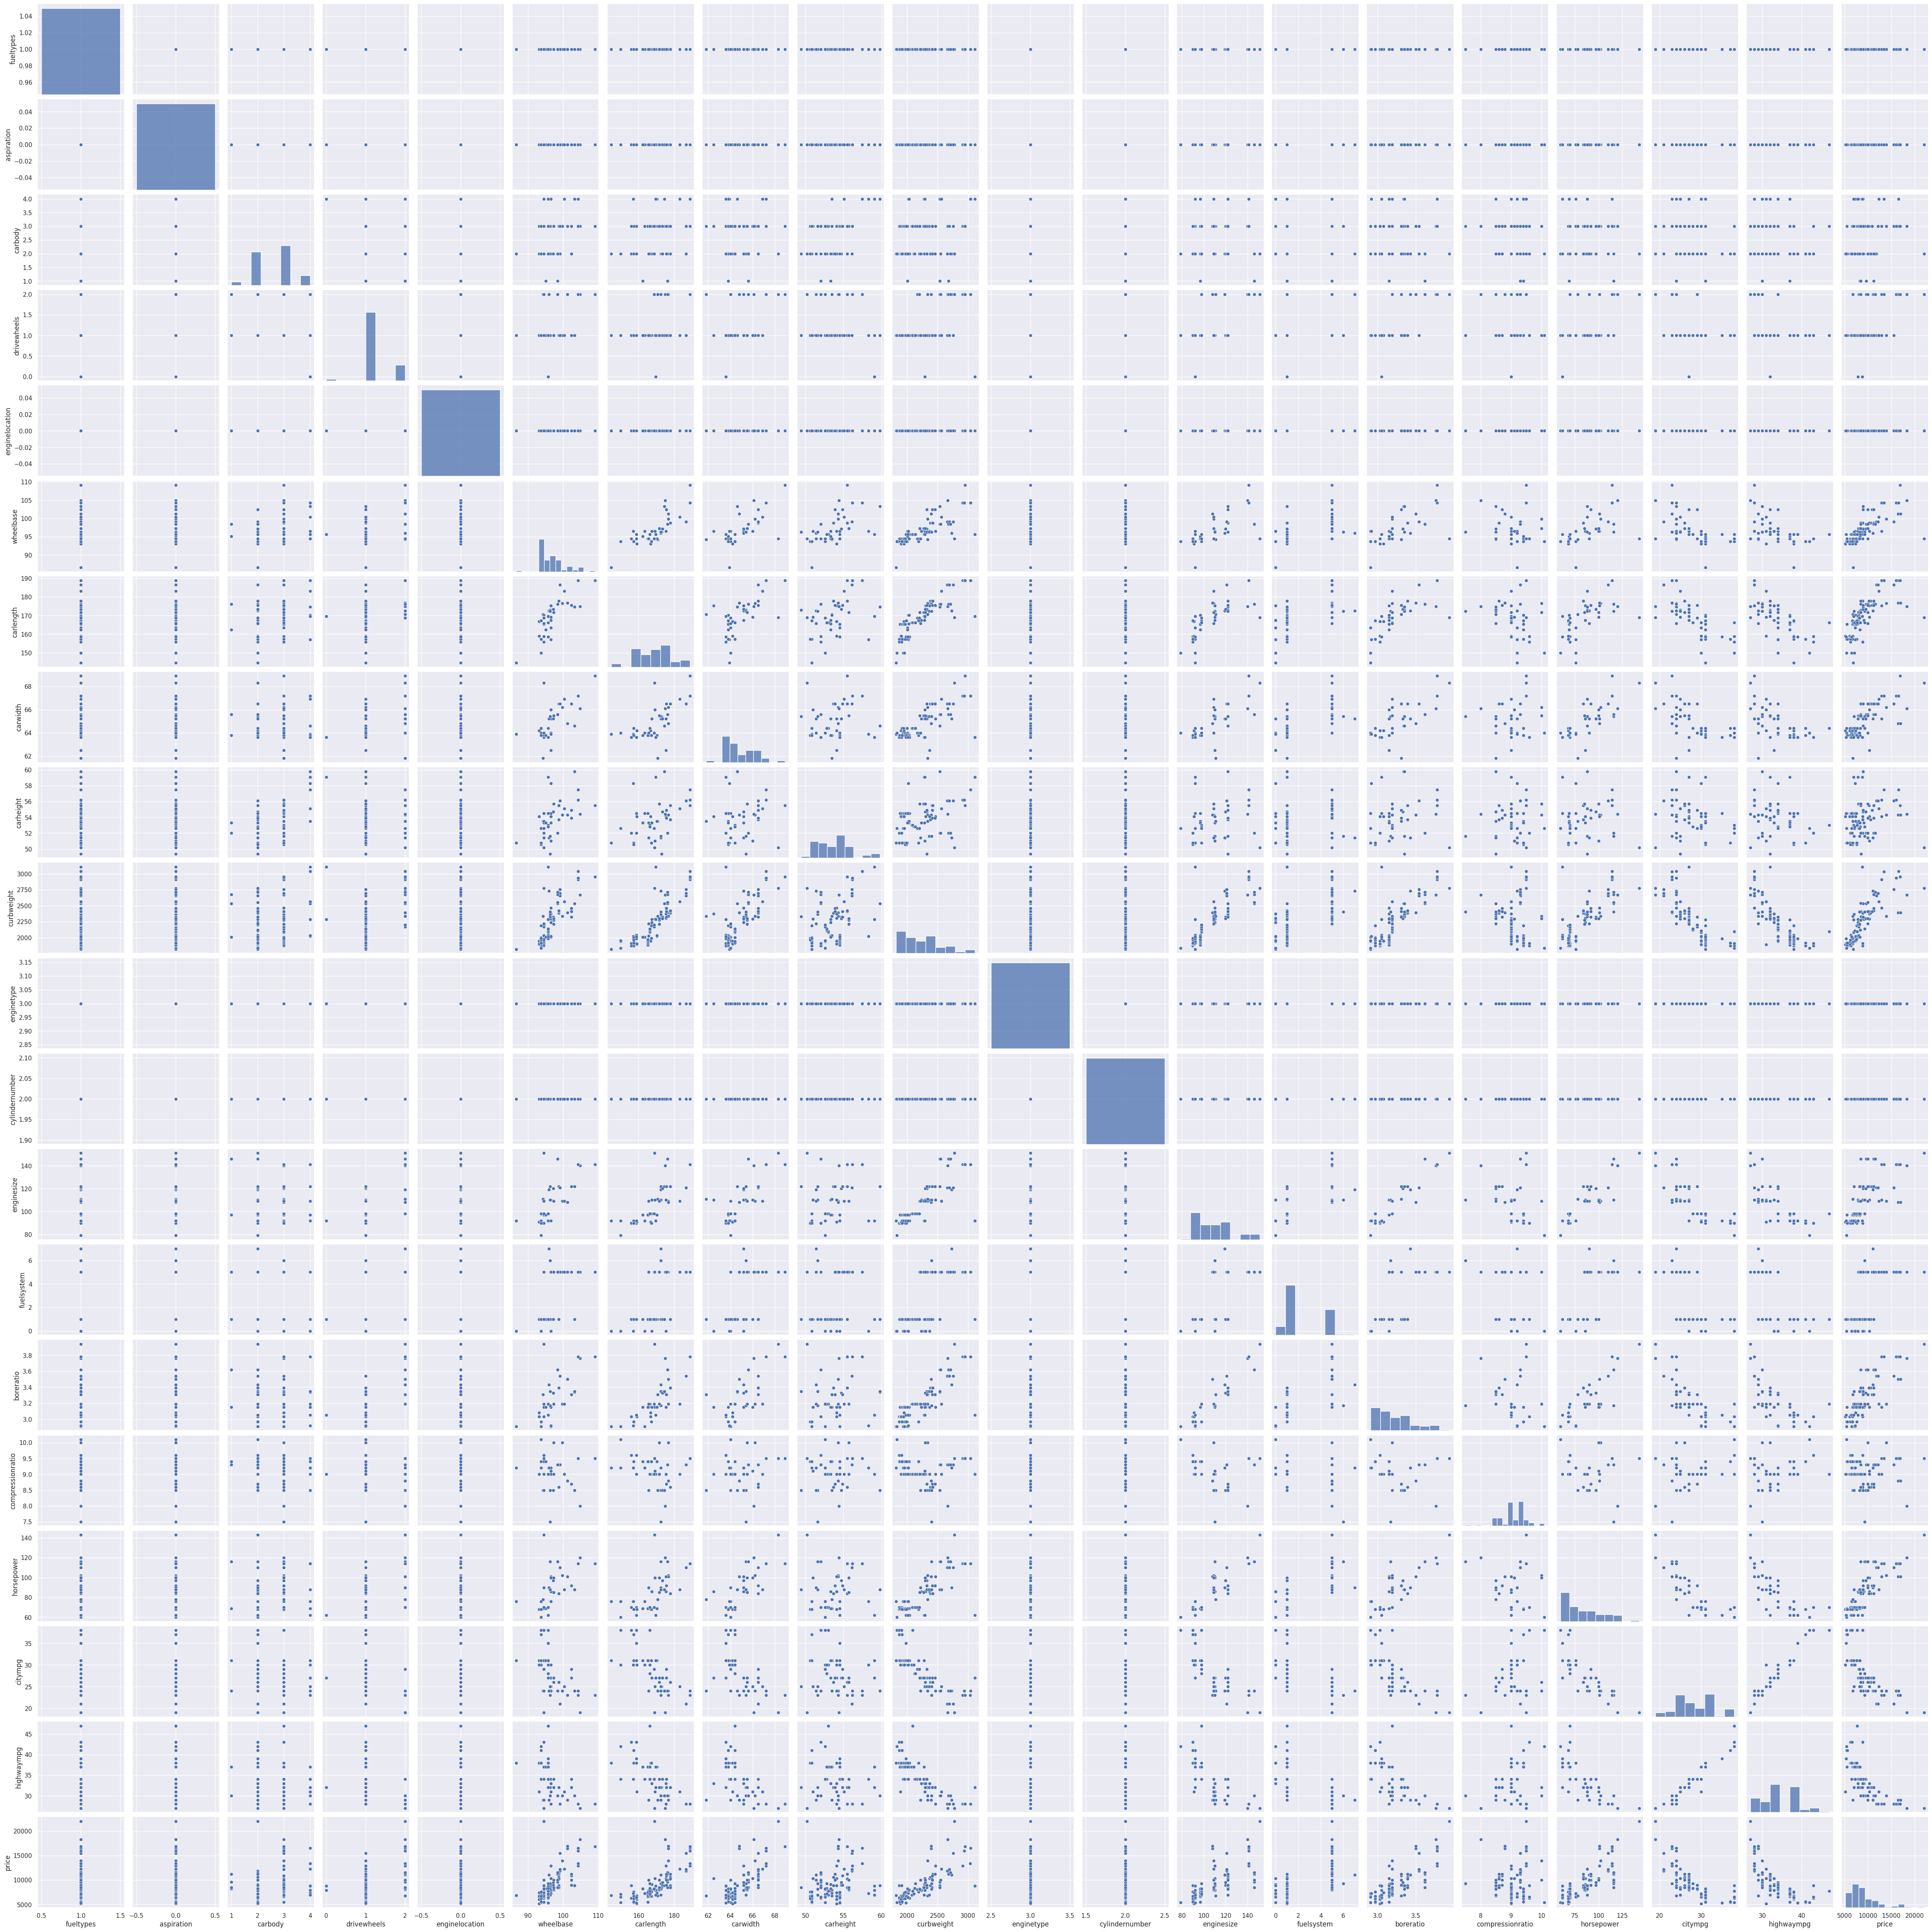

In [140]:
sns.pairplot(data2)

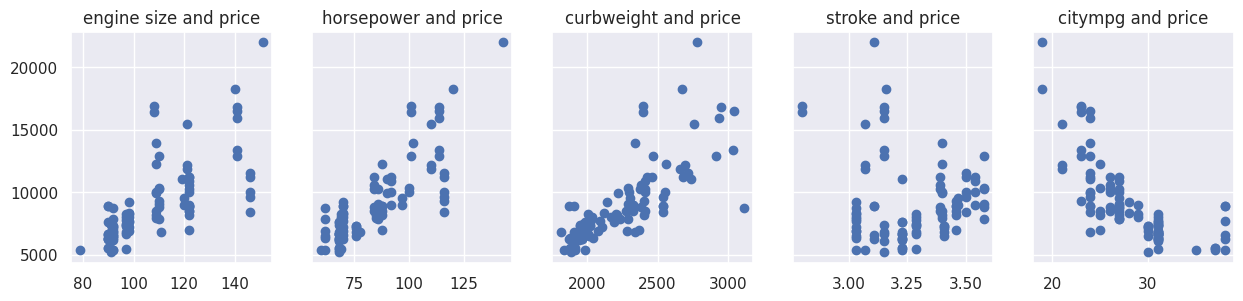

In [42]:
'''f, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1, 5, sharey=True, figsize =(15,3))
ax1.scatter(data2['enginesize'],data2['price'])
ax1.set_title('engine size and price')
ax2.scatter(data2['horsepower'],data2['price'])
ax2.set_title('horsepower and price')
ax3.scatter(data2['curbweight'],data2['price'])
ax3.set_title('curbweight and price')
ax4.scatter(data2['stroke'],data2['price'])
ax4.set_title('stroke and price')
ax5.scatter(data2['citympg'],data2['price'])
ax5.set_title('citympg and price')

plt.show()'''

<Axes: xlabel='enginelocation'>

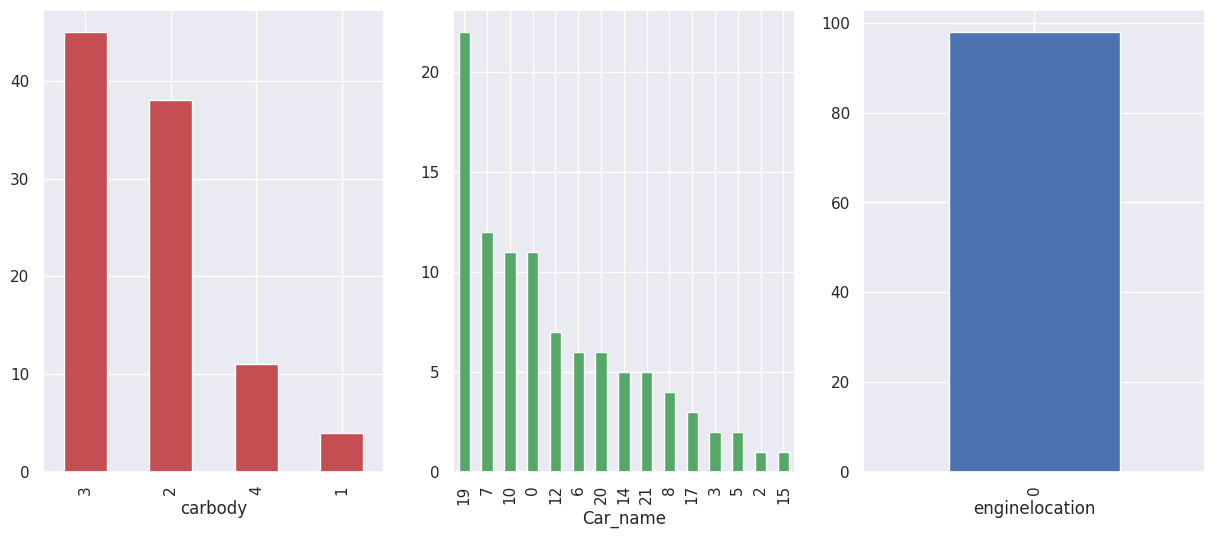

In [43]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
data2.carbody.value_counts().plot(kind='bar',color='r')
plt.subplot(1,3,2)
data2.Car_name.value_counts().plot(kind='bar',color='g')
plt.subplot(1,3,3)
data2.enginelocation.value_counts().plot(kind='bar',color='b')

Observation:

Toyota seemed to be favored car company.
Number of gas fueled cars are more than diesel.
Linearity observed between price and several columns

Normalize


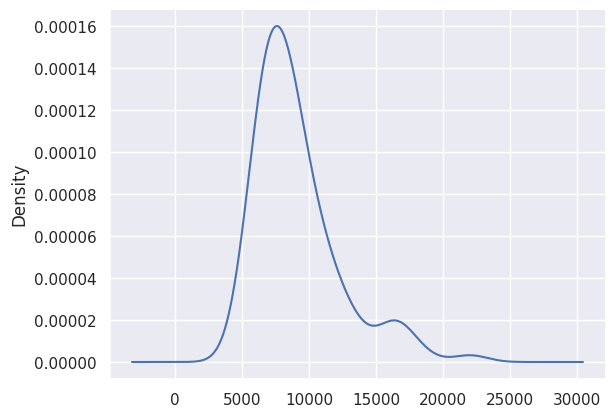

In [44]:
#Our dependent values(y) are price
data2.price.plot.density()
plt.show()

In [45]:
log_price = np.log(data2['price'])

# Then we add it to our data frame
data2['log_price'] = log_price

<ipython-input-45-fa052cc36703>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['log_price'] = log_price


In [46]:
data_normal=data2.drop(['price'],axis=1)
data_normal

,symboling,fueltypes,Car_name,aspiration,doornumbers,carbody,drivewheels,enginelocation,carheight,curbweight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,log_price
3,2,1,2,0,0,3,1,0,54.3,2337,...,2,109,5,3.19,3.40,10.0,102,5500,24,9.543235
10,2,1,3,0,1,3,2,0,54.3,2395,...,2,108,5,3.50,2.80,8.8,101,5800,23,9.706864
11,0,1,3,0,0,3,2,0,54.3,2395,...,2,108,5,3.50,2.80,8.8,101,5800,23,9.736547
19,1,1,5,0,1,2,1,0,52.0,1874,...,2,90,1,3.03,3.11,9.6,70,5400,38,8.747511
20,0,1,5,0,0,3,1,0,52.0,1909,...,2,90,1,3.03,3.11,9.6,70,5400,38,8.791030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-2,1,21,0,0,3,2,0,56.2,2912,...,2,141,5,3.78,3.15,9.5,114,5400,23,9.468079
195,-1,1,21,0,0,4,2,0,57.5,3034,...,2,141,5,3.78,3.15,9.5,114,5400,23,9.504129
196,-2,1,21,0,0,3,2,0,56.2,2935,...,2,141,5,3.78,3.15,9.5,114,5400,24,9.679406
197,-1,1,21,0,0,4,2,0,57.5,3042,...,2,141,5,3.78,3.15,9.5,114,5400,24,9.712024


<Axes: ylabel='Density'>

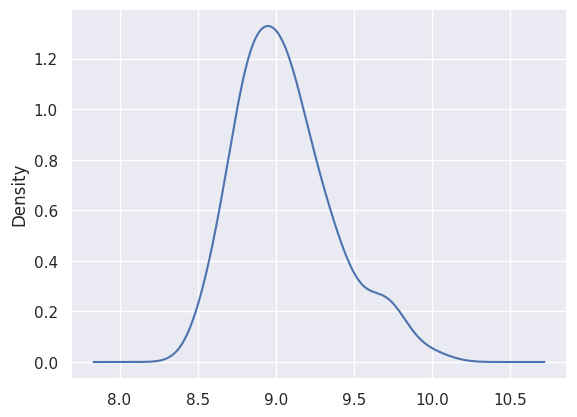

In [47]:
data2.log_price.plot.density()

<Axes: >

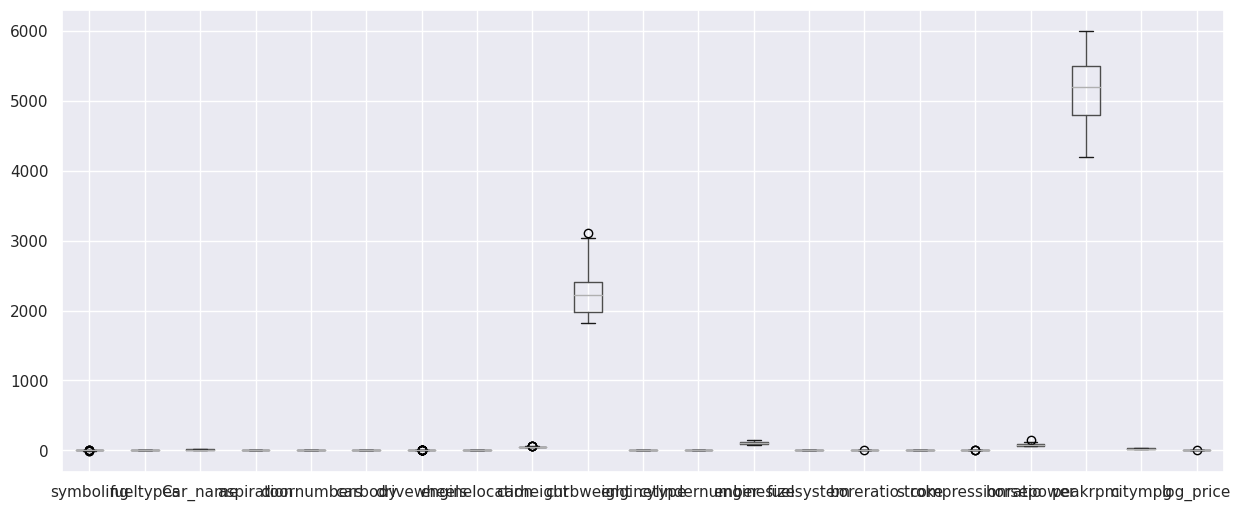

In [48]:
plt.figure(figsize=(15,6))
data_normal.boxplot()

Much more better.Let's continue with multicollinearity

Multicollinearity
Sklearn does not have a built-in way to check for multicollinearity.One of the main reasons is that this is an issue well covered in statistical\frameworks and not in ML ones surely it is an issue nonetheless, thus we will try to deal with it. To make this as easy as possible to use, we declare a variable where we put all features where we want to check for multicollinearity since our categorical data is not yet preprocessed, we will only take the numerical ones

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_normal[['symboling', 'carheight', 'curbweight',
        'enginesize',  'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg']]


In [50]:
vif = pd.DataFrame()

In [51]:
# here we make use of the variance_inflation_factor, which will basically output the respective VIFs
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

In [52]:
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.401165,symboling
1,1014.877892,carheight
2,354.850326,curbweight
3,1207.046177,enginesize
4,2188.635230,boreratio
5,596.929595,stroke
6,986.788056,compressionratio
7,237.707703,horsepower
8,360.909574,peakrpm
9,216.938983,citympg


In [53]:
#carheight,compressionratio,boreratio,stroke,curbweight,peakrpm,enginesize c
#columns have strong multicollinearity so I'm going drop these columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_normal[['symboling',
       'horsepower', 'citympg']]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,1.481988,symboling
1,8.497193,horsepower
2,8.687280,citympg


In [54]:
data_multi=data_normal.drop(['carheight','compressionratio','boreratio','stroke','curbweight','peakrpm','enginesize'],axis=1)
data_multi

,symboling,fueltypes,Car_name,aspiration,doornumbers,carbody,drivewheels,enginelocation,enginetype,cylindernumber,fuelsystem,horsepower,citympg,log_price
3,2,1,2,0,0,3,1,0,3,2,5,102,24,9.543235
10,2,1,3,0,1,3,2,0,3,2,5,101,23,9.706864
11,0,1,3,0,0,3,2,0,3,2,5,101,23,9.736547
19,1,1,5,0,1,2,1,0,3,2,1,70,38,8.747511
20,0,1,5,0,0,3,1,0,3,2,1,70,38,8.791030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-2,1,21,0,0,3,2,0,3,2,5,114,23,9.468079
195,-1,1,21,0,0,4,2,0,3,2,5,114,23,9.504129
196,-2,1,21,0,0,3,2,0,3,2,5,114,24,9.679406
197,-1,1,21,0,0,4,2,0,3,2,5,114,24,9.712024


Dummies


In [55]:
data_dummies=pd.get_dummies(data_multi, drop_first=True)
data_dummies

,symboling,fueltypes,Car_name,aspiration,doornumbers,carbody,drivewheels,enginelocation,enginetype,cylindernumber,fuelsystem,horsepower,citympg,log_price
3,2,1,2,0,0,3,1,0,3,2,5,102,24,9.543235
10,2,1,3,0,1,3,2,0,3,2,5,101,23,9.706864
11,0,1,3,0,0,3,2,0,3,2,5,101,23,9.736547
19,1,1,5,0,1,2,1,0,3,2,1,70,38,8.747511
20,0,1,5,0,0,3,1,0,3,2,1,70,38,8.791030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-2,1,21,0,0,3,2,0,3,2,5,114,23,9.468079
195,-1,1,21,0,0,4,2,0,3,2,5,114,23,9.504129
196,-2,1,21,0,0,3,2,0,3,2,5,114,24,9.679406
197,-1,1,21,0,0,4,2,0,3,2,5,114,24,9.712024


Linear Regression Model


In [56]:
y = data_dummies ['log_price']
x1 = data_dummies.drop(['log_price'],axis=1)
x = sm.add_constant(pd.DataFrame(x1))

In [141]:
x

,symboling,fueltypes,Car_name,aspiration,doornumbers,carbody,drivewheels,enginelocation,enginetype,cylindernumber,fuelsystem,horsepower,citympg
3,2,1,2,0,0,3,1,0,3,2,5,102,24
10,2,1,3,0,1,3,2,0,3,2,5,101,23
11,0,1,3,0,0,3,2,0,3,2,5,101,23
19,1,1,5,0,1,2,1,0,3,2,1,70,38
20,0,1,5,0,0,3,1,0,3,2,1,70,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-2,1,21,0,0,3,2,0,3,2,5,114,23
195,-1,1,21,0,0,4,2,0,3,2,5,114,23
196,-2,1,21,0,0,3,2,0,3,2,5,114,24
197,-1,1,21,0,0,4,2,0,3,2,5,114,24


In [142]:
x1

,symboling,fueltypes,Car_name,aspiration,doornumbers,carbody,drivewheels,enginelocation,enginetype,cylindernumber,fuelsystem,horsepower,citympg
3,2,1,2,0,0,3,1,0,3,2,5,102,24
10,2,1,3,0,1,3,2,0,3,2,5,101,23
11,0,1,3,0,0,3,2,0,3,2,5,101,23
19,1,1,5,0,1,2,1,0,3,2,1,70,38
20,0,1,5,0,0,3,1,0,3,2,1,70,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-2,1,21,0,0,3,2,0,3,2,5,114,23
195,-1,1,21,0,0,4,2,0,3,2,5,114,23
196,-2,1,21,0,0,3,2,0,3,2,5,114,24
197,-1,1,21,0,0,4,2,0,3,2,5,114,24


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
inputs_scaled = scaler.transform(x)
inputs_scaled

array([[ 1.17079158,  0.        , -1.4216383 , ...,  1.39716366,
         1.01533893, -0.9573171 ],
       [ 1.17079158,  0.        , -1.2745205 , ...,  1.39716366,
         0.96024302, -1.18338234],
       [-0.69486004,  0.        , -1.2745205 , ...,  1.39716366,
         0.96024302, -1.18338234],
       ...,
       [-2.56051167,  0.        ,  1.37359984, ...,  1.39716366,
         1.67648986, -0.9573171 ],
       [-1.62768585,  0.        ,  1.37359984, ...,  1.39716366,
         1.67648986, -0.9573171 ],
       [-1.62768585,  0.        ,  1.37359984, ...,  1.39716366,
         1.67648986, -1.18338234]])

In [58]:
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, y, test_size=0.2, random_state=42)

In [59]:
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y_train,x_train).fit()
# Print a nice summary of the regression.
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   0.019
Model:                            OLS   Adj. R-squared (uncentered):             -0.094
Method:                 Least Squares   F-statistic:                             0.1662
Date:                Sat, 10 Aug 2024   Prob (F-statistic):                       0.995
Time:                        14:38:18   Log-Likelihood:                         -281.80
No. Observations:                  78   AIC:                                      579.6
Df Residuals:                      70   BIC:                                      598.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5149      1.458     -0.353      0.725      -3.422       2.392
const       4.134e-16   6.75e-16      0.612      0.542   -9.33e-16    1.76e-15
x2             0.1288      1.288      0.100      0.921      -2.441       2.698
x3          4.038e-16   5.96e-16      0.677      0.501   -7.86e-16    1.59e-15
x4             0.2747      1.602      0.171      0.864      -2.921       3.470
x5            -0.3708      1.379     -0.269      0.789      -3.121       2.380
x6             1.0120      1.473      0.687      0.494      -1.925       3.949
x7         -1.806e-16   2.32e-16     -0.778      0.439   -6.44e-16    2.83e-16
x8                  0          0        nan        nan           0           0
x9                  0          0        nan        nan           0           0
x10           -0.5803      2.069     -0.280      0.780      -4.706       3.546
x11           -1.7563      2.648     -0.663      0.509      -7.037       3.525
x12           -1.1739      2.067     -0.568      0.572      -5.296       2.948
==============================================================================
Omnibus:                        5.426   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                6.166
Skew:                          -0.291   Prob(JB):                       0.0458
Kurtosis:                       4.248   Cond. No.                     5.31e+34
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 8.42e-68. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.1e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.


**p-vale of the columns 2,3,5,6,15,16,40 seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.


In [62]:
new_x=[]
for i in [2,3,5,6,13]:
    if i < len(list(x.columns)):  # Check if index is within bounds
        new_x.append(list(x.columns)[i])
    else:
        print(f"Warning: Index {i} out of range for x.columns")  # Notify about out-of-bounds indices
new_data=x[new_x]

In [63]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
scaler.fit(new_data)
inputs_scaled = scaler.transform(new_data)

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, y, test_size=0.2, random_state=42)

In [65]:
results = sm.OLS(y_train,x_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.038
Method:                 Least Squares   F-statistic:                            0.03664
Date:                Sat, 10 Aug 2024   Prob (F-statistic):                       0.991
Time:                        14:39:22   Log-Likelihood:                         -282.47
No. Observations:                  78   AIC:                                      570.9
Df Residuals:                      75   BIC:                                      578.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0751      1.052     -0.071      0.943      -2.171       2.021
const       5.978e-17   2.62e-16      0.229      0.820   -4.61e-16    5.81e-16
x2            -0.2383      1.049     -0.227      0.821      -2.328       1.852
x3             0.2101      1.044      0.201      0.841      -1.870       2.291
==============================================================================
Omnibus:                        1.808   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.405   Jarque-Bera (JB):                1.806
Skew:                           0.347   Prob(JB):                        0.405
Kurtosis:                       2.726   Cond. No.                     6.25e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.66e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Conclusion


In [66]:
y_hat = results.predict(x_train)

In [67]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(np.exp(y_train), np.exp(y_hat))
lin_mae

8975.466916175881

<ipython-input-68-bf7f72c97d78>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_hat), bins = 20)


Text(0.5, 0, 'Errors')

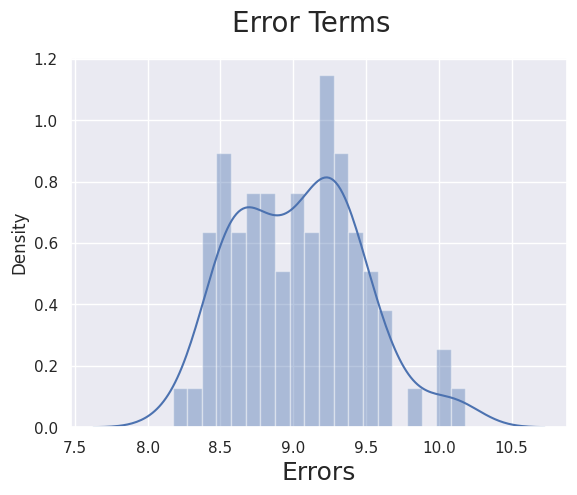

In [68]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_hat), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)
